In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Case Time Series:

In [2]:
api_url = 'https://api.covid19india.org/data.json'
r = requests.get(api_url)
data = r.json()

In [3]:
time = data.get('cases_time_series')

date_list = []
dailyconfirmed_list = []
dailydeceased_list = []
dailyrecovered_list = []

totalconfirmed_list = []
totaldeceased_list = []
totalrecovered_list = []

for t in range(len(time)):
    
    date = time[t].get('date')
    date_list.append(date)
    
    dailyconfirmed = time[t].get('dailyconfirmed')
    dailyconfirmed_list.append(dailyconfirmed)
    
    dailydeceased = time[t].get('dailydeceased')
    dailydeceased_list.append(dailydeceased)
    
    dailyrecovered = time[t].get('dailyrecovered')
    dailyrecovered_list.append(dailyrecovered)
    
    totalconfirmed = time[t].get('totalconfirmed')
    totalconfirmed_list.append(totalconfirmed)
    
    totalrecovered = time[t].get('totalrecovered')
    totalrecovered_list.append(dailydeceased)
    
    totaldeceased = time[t].get('totaldeceased')
    totaldeceased_list.append(dailyrecovered)

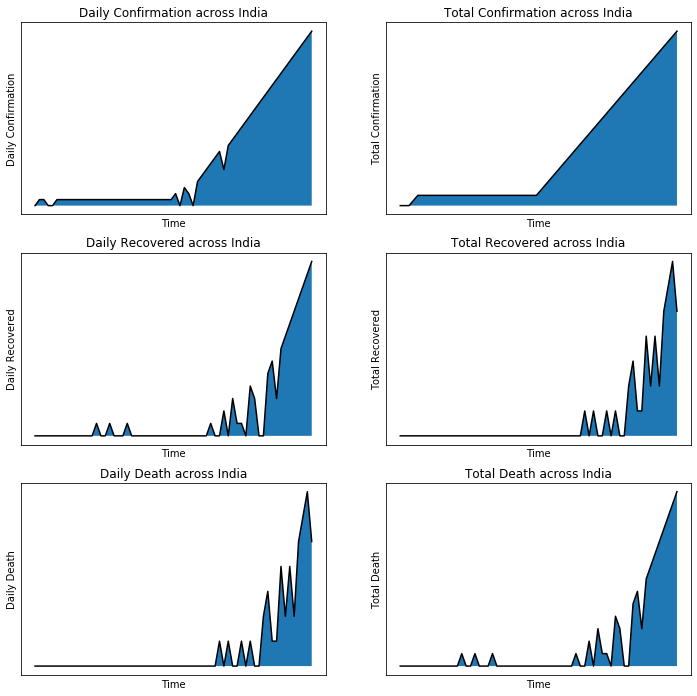

In [4]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.plot(date_list, dailyconfirmed_list, color='black')
# plt.bar(date_list, dailyconfirmed_list)
plt.fill_between(date_list, dailyconfirmed_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Daily Confirmation')
plt.title('Daily Confirmation across India')

plt.subplot(3,2,2)
plt.plot(date_list, totalconfirmed_list, color='black')
# plt.bar(date_list, totalconfirmed_list)
plt.fill_between(date_list, totalconfirmed_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Total Confirmation')
plt.title('Total Confirmation across India')

plt.subplot(3,2,3)
plt.plot(date_list, dailyrecovered_list, color='black')
# plt.bar(date_list, dailyrecovered_list)
plt.fill_between(date_list, dailyrecovered_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Daily Recovered')
plt.title('Daily Recovered across India')

plt.subplot(3,2,4)
plt.plot(date_list, totalrecovered_list, color='black')
# plt.bar(date_list, totalrecovered_list)
plt.fill_between(date_list, totalrecovered_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Total Recovered')
plt.title('Total Recovered across India')

plt.subplot(3,2,5)
plt.plot(date_list, dailydeceased_list, color='black')
# plt.bar(date_list, dailydeceased_list)
plt.fill_between(date_list, dailydeceased_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Daily Death')
plt.title('Daily Death across India')

plt.subplot(3,2,6)
plt.plot(date_list, totaldeceased_list, color='black')
# plt.bar(date_list, totaldeceased_list)
plt.fill_between(date_list, totaldeceased_list)
plt.xticks([])
plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Total Death')
plt.title('Total Death across India')

plt.savefig('plots.png')

# State data

In [5]:
state_data = data.get('statewise')

state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []

for j in range(len(state_data)):
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    state = state_data[j].get('state')
    
    if confirmed != '0':
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        state_list.append(state)

In [6]:
confirmed_list_array = np.array(confirmed_list, dtype = int)
recovered_list_array = np.array(recovered_list, dtype = int)
deaths_list_array = np.array(deaths_list, dtype = int)

death_rate = np.divide(deaths_list_array, confirmed_list_array)*100

recovery_rate = np.divide(recovered_list_array, confirmed_list_array)*100

In [7]:
state_data = {'':state_list, 'Confirmed':confirmed_list, 'Recovered':recovered_list, 'Deaths':deaths_list, 'Recovery Rate(%)':recovery_rate, 'Death Rate(%)':death_rate}
df_state_data = pd.DataFrame(state_data)
df_state_data.to_csv('State_data.csv')
df_state_data

,,Confirmed,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,Total,2586,192,73,7.424594,2.822892
1,Maharashtra,423,42,21,9.929078,4.964539
2,Tamil Nadu,309,6,1,1.941748,0.323625
3,Delhi,293,8,4,2.730375,1.365188
4,Kerala,286,28,2,9.790210,0.699301
5,Andhra Pradesh,161,2,0,1.242236,0.000000
6,Rajasthan,154,3,0,1.948052,0.000000
7,Telangana,154,17,9,11.038961,5.844156
8,Uttar Pradesh,128,17,2,13.281250,1.562500
9,Karnataka,124,11,3,8.870968,2.419355


In [8]:
html = df_state_data.to_html('State_data.html',border=1)

In [9]:
message = """
<html>
   <h1>
      <title>Insights of Covid'19 India</title>
   </h1>
   <body>
      <h1>Insights of Covid'19 India</h1>
      <p>Made by Rajarshi Bhadra</p>
      <p><a href="https://github.com/sudo-rajarshi">Click here to visit my GitHub Profile</a>
   </body>	
</html>
"""

f = open("intro.html","w")
f.write(message)
f.close()

In [10]:
stat = """
<!DOCTYPE html>
<html lang="en">
   <h3>
      Some Graphs using which in we'll be able to see in which direction we're moving against The Novel Corona Virus:
   </h3>
    <body>
        <img src="plots.png" alt="Flying Kites">
    </body>
</html>    
"""

g = open("stat.html","w")
g.write(stat)
g.close()

In [11]:
with open('State_data.html') as fp: 
    data1 = fp.read() 
  
with open('intro.html') as fp: 
    data2 = fp.read() 
  
with open('stat.html') as fp:
    data3 = fp.read()
    
data = data2 + data1 + data3
  
with open ('index.html', 'w') as fp: 
    fp.write(data) 